In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


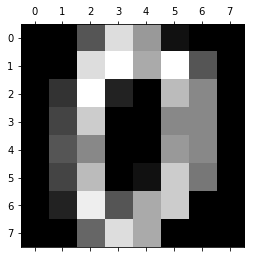

In [16]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [17]:
from sklearn.model_selection import train_test_split

y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [22]:
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Eindeutige vorhergesagte Label: {}".format(np.unique(pred_most_frequent)))
print("Genauigkeit auf den Testdaten: {}".format(dummy_majority.score(X_test, y_test)))

Eindeutige vorhergesagte Label: [False]
Genauigkeit auf den Testdaten: 0.8955555555555555


In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Genauigkeit auf den Testdaten: {:.2f}".format(tree.score(X_test, y_test)))

Genauigkeit auf den Testdaten: 0.92


In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg-Genauigkeit: {:.2f}".format(logreg.score(X_test,y_test)))

logreg-Genauigkeit: 0.98


In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Konfusionmatrix:\n{}".format(confusion))

Konfusionmatrix:
[[401   2]
 [  8  39]]


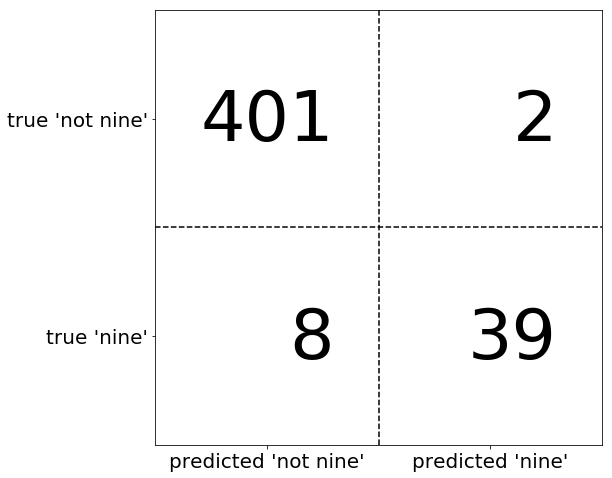

In [28]:
import mglearn
% matplotlib inline

mglearn.plots.plot_confusion_matrix_illustration()

In [31]:
from sklearn.metrics import f1_score


print("f1-score häufigste kategorie: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-score entscheidungsbaum: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-score logistische regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-score häufigste kategorie: 0.00
f1-score entscheidungsbaum: 0.55
f1-score logistische regression: 0.89


/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["nicht neun", "neun"]))

             precision    recall  f1-score   support

 nicht neun       0.90      1.00      0.94       403
       neun       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
